In [350]:
import pandas as pd
churn_data = pd.read_csv('churn.csv')
churn_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


9.1. Каково соотношение ушедших и лояльных клиентов? 


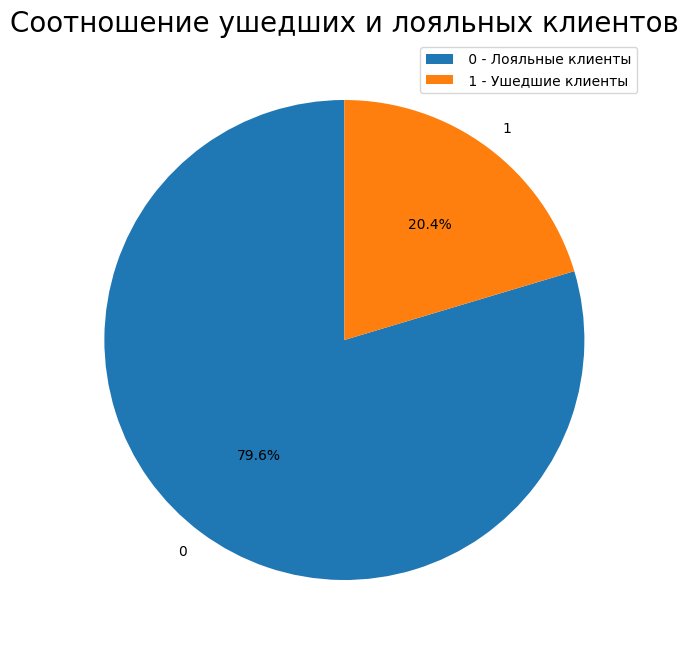

In [351]:
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('default')



fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes((1, 1, 1, 1))
Exited_count = churn_data['Exited'].value_counts()
pie = ax.pie(
    Exited_count,
    labels=Exited_count.index,
    autopct='%1.1f%%',
    startangle=90
)
title = ax.set_title('Cоотношение ушедших и лояльных клиентов', fontsize=20)
ax.legend([' 0 - Лояльные клиенты', ' 1 - Ушедшие клиенты'])

plt.show(pie)


На данный момент из всех клиентов банка 20.4% ушедшие и 79.6% остаются лояльными.

9.2. Распределение баланса пользователей, у которых на счету больше 2 500 долларов.

Text(0, 0.5, 'Колличество')

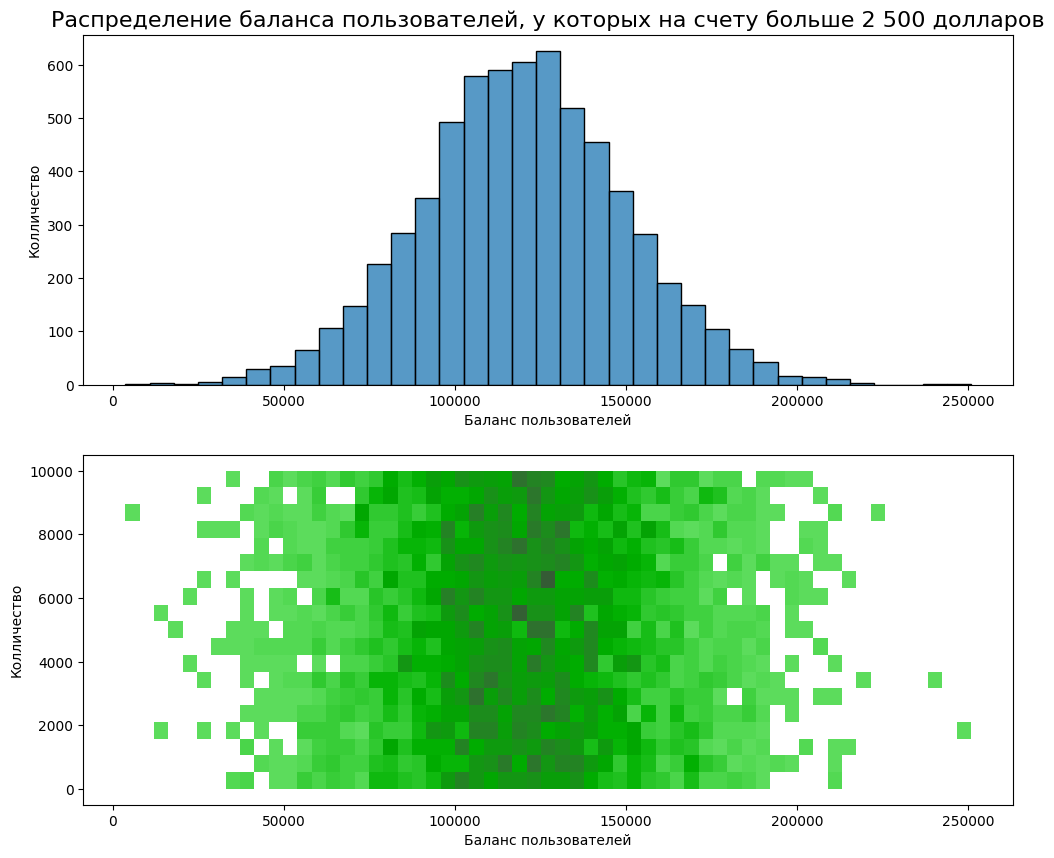

In [352]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

mask = churn_data['Balance'] > 2500

churn_data[mask]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

histplot = sns.histplot(
    data=churn_data[mask], 
    x="Balance", 
    bins=35,
    ax=axes[0],
    
   
    
)

histplot.set_title('Распределение баланса пользователей, у которых на счету больше 2 500 долларов', fontsize=16)
histplot.set_xlabel('Баланс пользователей')
histplot.set_ylabel('Колличество')


histplot2 = sns.histplot(
    data=churn_data[mask],
    x='Balance',
    y='RowNumber',
    color='green',
    ax=axes[1]
)
histplot2.set_xlabel('Баланс пользователей')
histplot2.set_ylabel('Колличество')



Если брать во внимание баланс клиентов свыше 2500 долларов, то можно сделать вывод, что большая часть пользователей имеет баланс в интервале  90000 – 160000 долларов. 

9.3. Распределение баланса клиента в разрезе признака оттока

,Exited,Balance
0,0,72745.296779
1,1,91108.539337


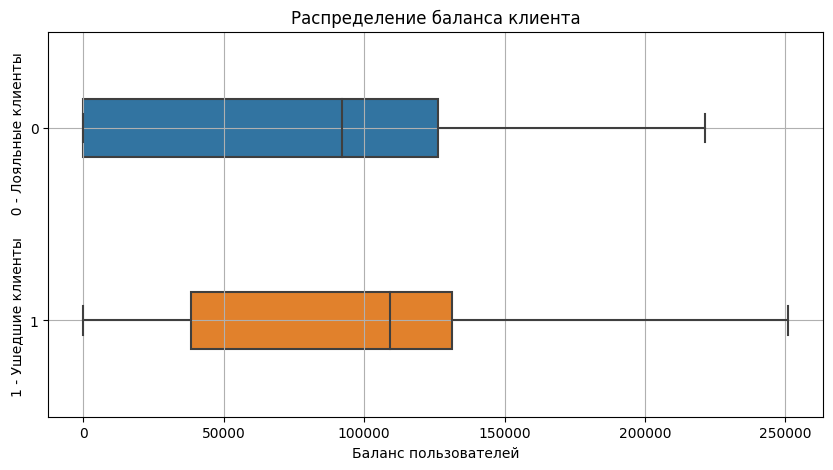

In [353]:


churn_data01 = churn_data.groupby(
    ['Exited'], as_index=False)["Balance"].mean()
display(churn_data01)

fig = plt.figure(figsize=(10, 5))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Balance',
    orient='h',
    width=0.3
)

boxplot.set_title('Распределение баланса клиента');
boxplot.set_xlabel('Баланс пользователей');
boxplot.set_ylabel( "1 - Ушедшие клиенты     0 - Лояльные клиенты");
boxplot.grid()


На графике распределения баланса клиента заметно, что у ушедших клиентов медианный баланс на накопительном счете больше, чем у лояльных. Думаю уход клиентов из банка, поспособствовало более привлекательные условия в стороннем банке.

9.4. Посмотрите на распределение возраста в разрезе признака оттока.

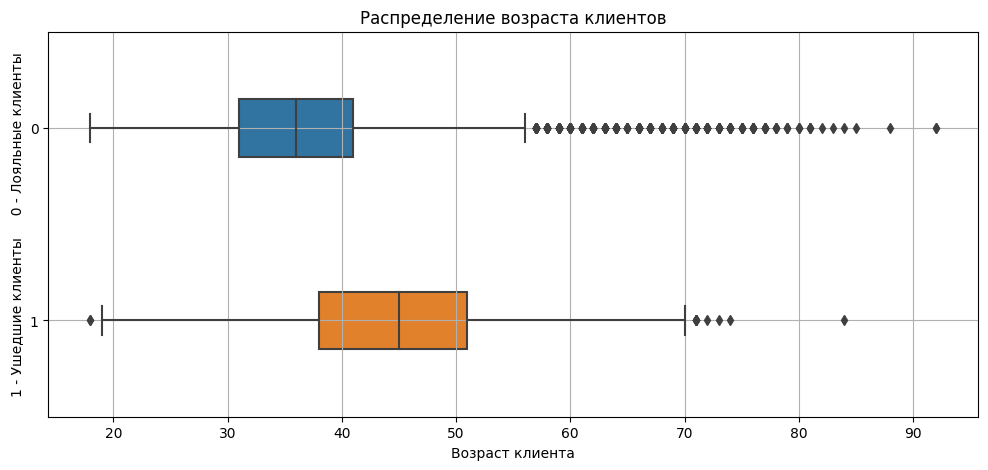

In [354]:
fig = plt.figure(figsize=(12, 5))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Age',
    orient='h',
    width=0.3
)

boxplot.set_title('Распределение возраста клиентов');
boxplot.set_xlabel('Возраст клиента');
boxplot.set_ylabel( "1 - Ушедшие клиенты     0 - Лояльные клиенты");
boxplot.grid()

На графике распределения возраста клиента заметно, что у ушедших клиентов возраст вирируется примерно от 37 до 52 лет. Банку следует уделить внимания именно этому возрастному диапазону клиентов.

9.5. Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты.

850
199992.48


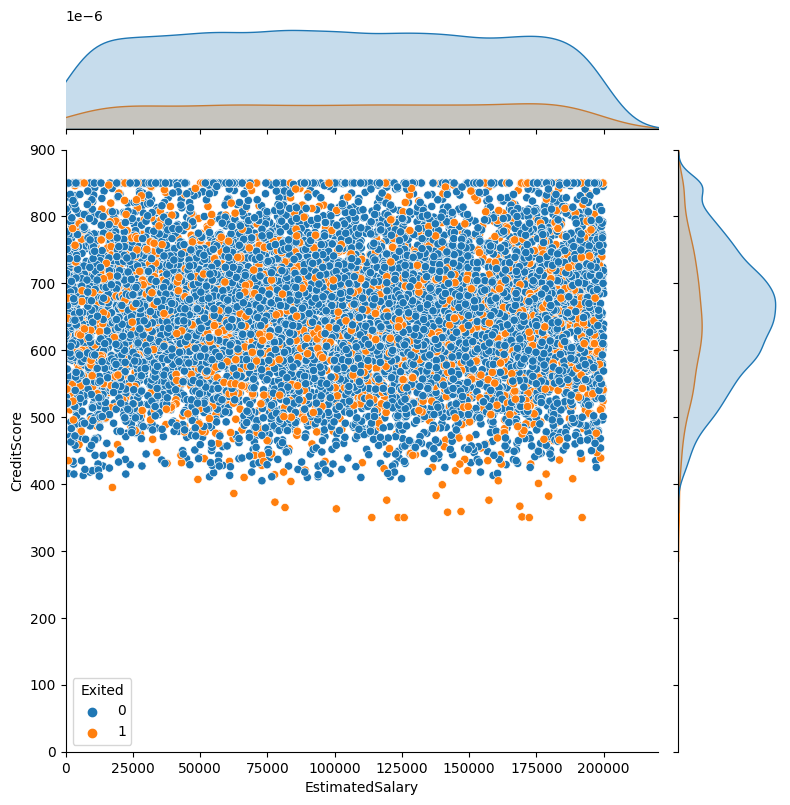

In [355]:


print(churn_data["CreditScore"].max())
print(churn_data["EstimatedSalary"].max())


jointplot = sns.jointplot(
    data=churn_data, 
    x='EstimatedSalary', 
    y='CreditScore',
    hue="Exited",
    xlim = (0, 220000),
    ylim = (0, 900),
    height=8,
)

Не наблюдаю взаимосвязь

9.6. Кто чаще уходит, мужчины или женщины? 

        Exited
Gender        
Female    1139
Male       898


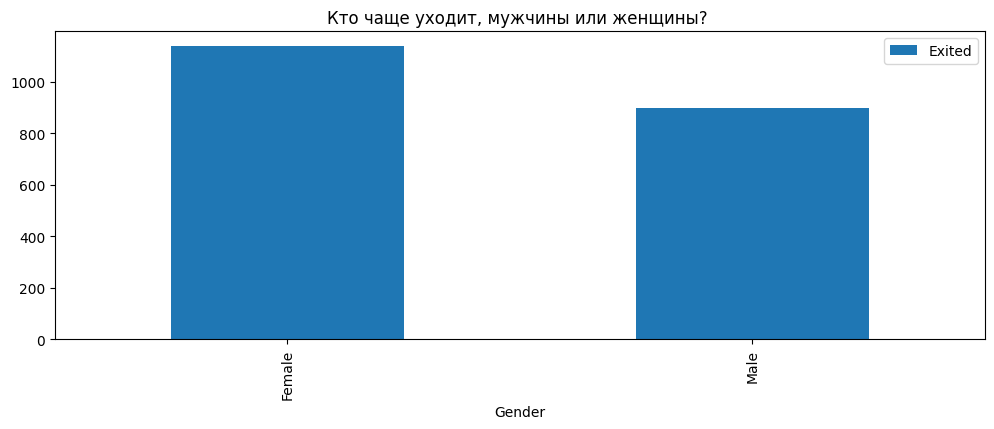

In [356]:

mask1 = churn_data[churn_data['Exited'] == 1]
exited = mask1.groupby(['Gender'])[["Exited"]].sum()

exited.plot( 
    kind='bar', 
    grid=False, 
    figsize=(12, 4),
    title='Кто чаще уходит, мужчины или женщины? ', 
);



print(exited)

9.7. Зависимость оттока клиентов от числа приобретённых у банка услуг

,NumOfProducts,Exited,RowNumber
0,1,0,3675
1,1,1,1409
2,2,0,4242
3,2,1,348
4,3,0,46
5,3,1,220
6,4,1,60


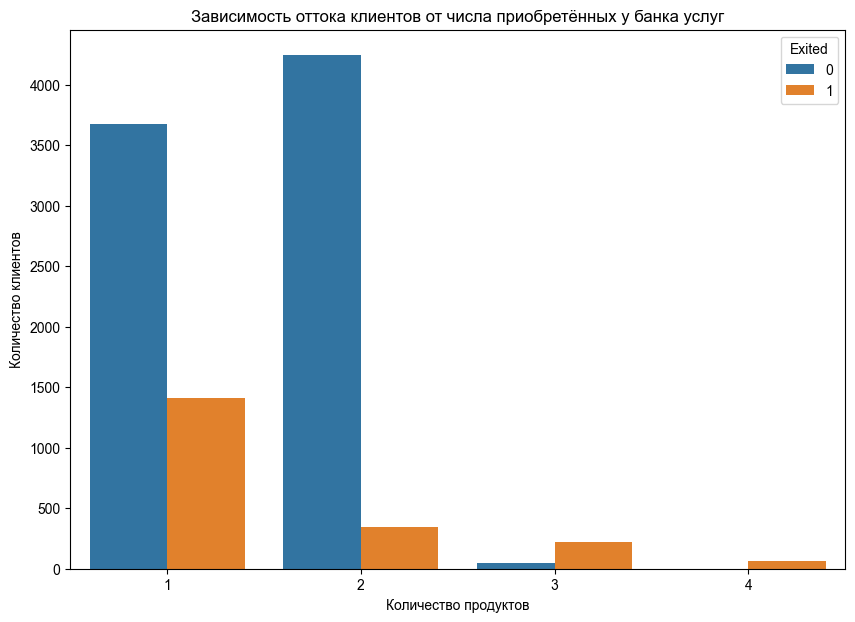

In [357]:

fig = plt.figure(figsize=(10, 7))


churn_data1 = churn_data.groupby(["NumOfProducts","Exited"],as_index=False)["RowNumber"].count()
display(churn_data1)


barplot = sns.barplot(
    data=churn_data1,
    x='NumOfProducts',
    y='RowNumber',
    hue="Exited"

    
    
)

sns.set_theme(style="whitegrid")
barplot.set_xlabel('Количество продуктов')
barplot.set_ylabel('Количество клиентов')
barplot.set_title('Зависимость оттока клиентов от числа приобретённых у банка услуг');



9.8. Как влияет наличие статуса активного клиента на отток клиентов

,IsActiveMember,Exited,RowNumber
0,0,0,3547
1,0,1,1302
2,1,0,4416
3,1,1,735


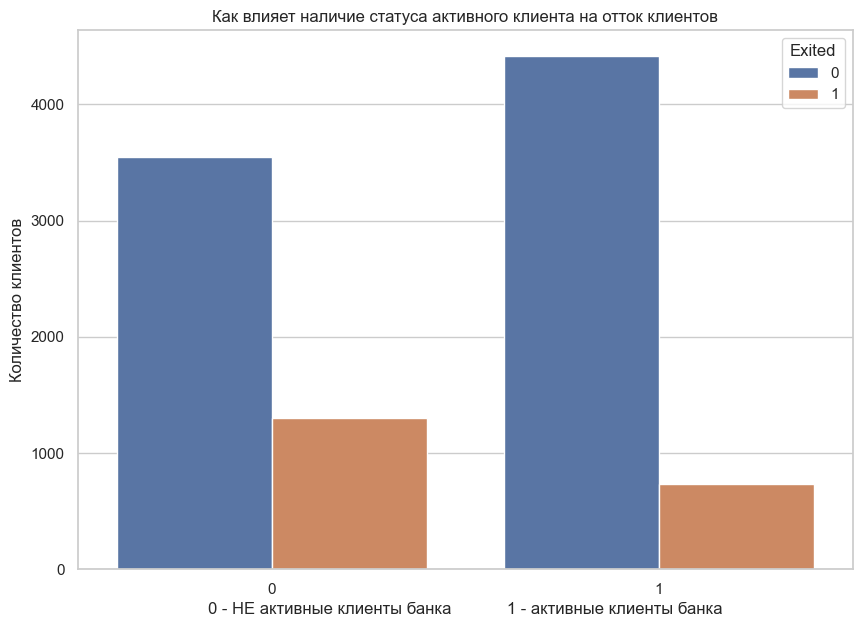

In [358]:
fig = plt.figure(figsize=(10, 7))


churn_data2 = churn_data.groupby(["IsActiveMember","Exited"],as_index=False)["RowNumber"].count()
display(churn_data2)


barplot = sns.barplot(
    data=churn_data2,
    x='IsActiveMember',
    y='RowNumber',
    hue="Exited"

    
    
)



sns.set_theme(style="whitegrid")
barplot.set_xlabel('0 - НЕ активные клиенты банка            1 - активные клиенты банка')
barplot.set_ylabel('Количество клиентов')
barplot.set_title('Как влияет наличие статуса активного клиента на отток клиентов');

По диаграмме заметно что среди активных клиентов отток меньше чем у не активных. Банку следует уделять больше внимания на менее активных клиентов, взаимодействуя с ними предоставляя банковские продукты и услуги.

9.9. В какой стране доля ушедших клиентов больше

In [359]:
churn_data3 = churn_data["Exited"] == 1

print(churn_data3)

churn_data4 = churn_data3.groupby(["Geography"])["RowNumber"].count()



0        True
1       False
2        True
3       False
4       False
        ...  
9995    False
9996    False
9997     True
9998     True
9999    False
Name: Exited, Length: 10000, dtype: bool


KeyError: 'Geography'